In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv")

In [2]:
data.stabf=data.stabf.map({'unstable':0,'stable':1})

In [3]:
X = data.drop(["stab","stabf"],axis=1)
y = data["stabf"]
y

0       0
1       1
2       0
3       0
4       0
5       1
6       0
7       0
8       1
9       0
10      1
11      0
12      1
13      0
14      0
15      0
16      0
17      1
18      0
19      0
20      0
21      1
22      1
23      1
24      0
25      1
26      0
27      1
28      1
29      1
       ..
9970    0
9971    1
9972    0
9973    1
9974    0
9975    0
9976    0
9977    0
9978    0
9979    0
9980    1
9981    0
9982    0
9983    1
9984    1
9985    0
9986    0
9987    0
9988    0
9989    0
9990    0
9991    0
9992    0
9993    0
9994    0
9995    0
9996    1
9997    1
9998    0
9999    0
Name: stabf, Length: 10000, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# K NEAREST NEIGHBORS(k-NN)

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import time

15


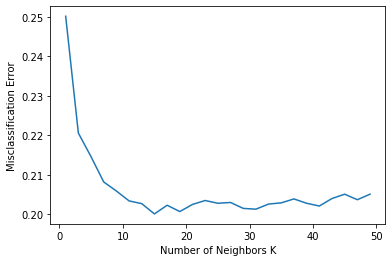

In [6]:
from sklearn.model_selection import cross_val_score
#hyper parameter tuning.Selecting best K
neighbors = [x for x in range(1,50) if x % 2 != 0]
# empty list that will hold cv scores
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
#graphical view
#misclassification error
MSE = [1-x for x in cv_scores]
#optimal K
optimal_k_index = MSE.index(min(MSE))
optimal_k = neighbors[optimal_k_index]
print(optimal_k)
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [7]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)

time_start = time.clock()
knn1 = knn.fit(X_train,y_train)
time_elapsed_knn_train = (time.clock() - time_start)

time_start = time.clock()
y_pred_knn = knn1.predict(X_test)
time_elapsed_knn_test = (time.clock() - time_start)

y_pred_knn 

C:\Users\aravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\aravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
C:\Users\aravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
C:\Users\aravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ =

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy_knn = accuracy_score(y_test,y_pred_knn)*100
cm_knn = confusion_matrix(y_test,y_pred_knn)
print("Accuracy Score for k-NN: {}".format(accuracy_knn))
print("Confustion Matrix \n{}" .format(cm_knn))

Accuracy Score for k-NN: 78.68
Confustion Matrix 
[[1395  174]
 [ 359  572]]


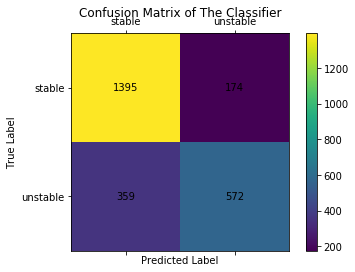

In [9]:
labels = ['stable', 'unstable']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_knn)
for (i, j), z in np.ndenumerate(cm_knn):
    ax.text(j, i, z, ha='center', va='center')
plt.title('Confusion Matrix of The Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

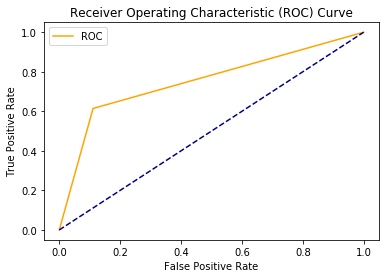

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [11]:
auc_knn = roc_auc_score(y_test, y_pred_knn)
print('AUC: %.2f' % auc_knn)

AUC: 0.75


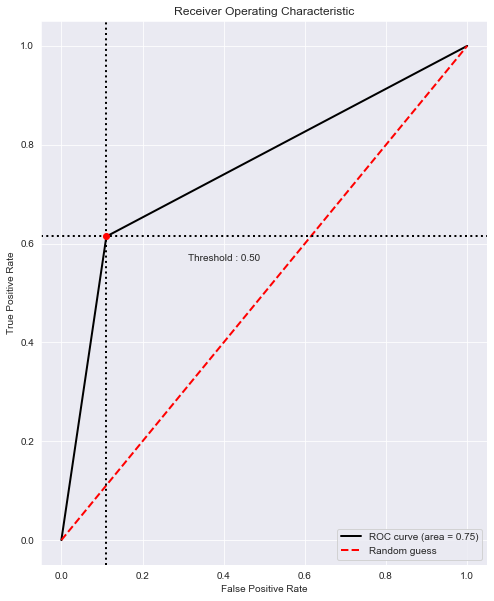

In [12]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred_knn, labels=["Stable", "Unstable"])

# Figures
plt.figure(figsize=(8,10))
bc.plot_roc_curve()
plt.show()

# NAIVE BAYES 

In [13]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

time_start = time.clock()
model_nb=nb.fit(X_train,y_train)
time_elapsed_nb_train = (time.clock() - time_start)

time_start = time.clock()
y_pred_nb=model_nb.predict(X_test)
time_elapsed_nb_test = (time.clock() - time_start)

y_pred_nb

C:\Users\aravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
C:\Users\aravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\aravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\aravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
accuracy_nb = accuracy_score(y_test,y_pred_nb)*100
cm_nb = confusion_matrix(y_test,y_pred_nb)
print("Accuracy Score for NB: {}".format(accuracy_nb))
print("Confustion Matrix \n{}" .format(cm_nb))

Accuracy Score for NB: 82.8
Confustion Matrix 
[[1458  111]
 [ 319  612]]


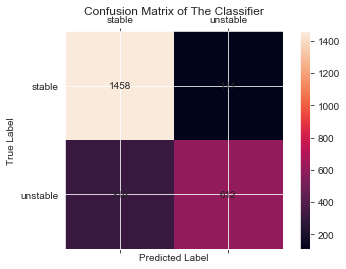

In [15]:
labels = ['stable', 'unstable']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_nb)
for (i, j), z in np.ndenumerate(cm_nb):
    ax.text(j, i, z, ha='center', va='center')
plt.title('Confusion Matrix of The Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

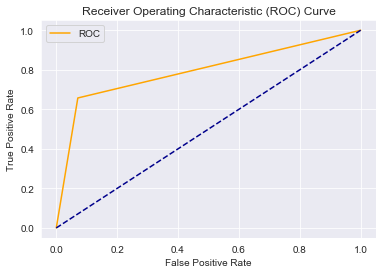

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [17]:
auc_nb = roc_auc_score(y_test, y_pred_nb)
print('AUC: %.2f' % auc_nb)

AUC: 0.79


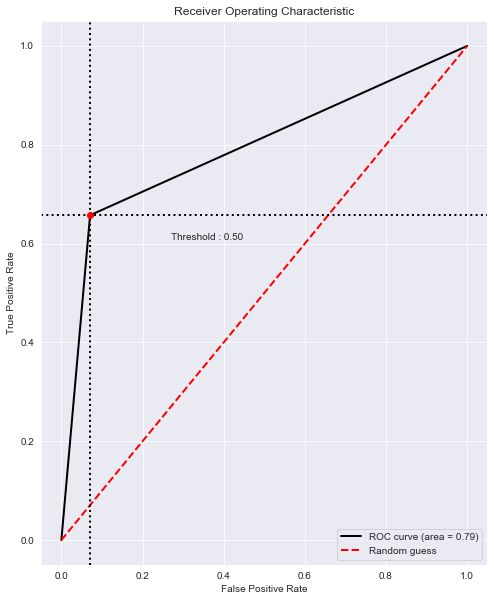

In [18]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred_nb, labels=["Stable", "Unstable"])

# Figures
plt.figure(figsize=(8,10))
bc.plot_roc_curve()
plt.show()

# DECISION TREES

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)

time_start = time.clock()
model_dt=dt.fit(X_train,y_train)
time_elapsed_dt_train = (time.clock() - time_start)

time_start = time.clock()
y_pred_dt=model_dt.predict(X_test)
time_elapsed_dt_train = (time.clock() - time_start)

y_pred_dt

C:\Users\aravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
C:\Users\aravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\aravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\aravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
accuracy_dt = accuracy_score(y_test,y_pred_dt)*100
cm_dt = confusion_matrix(y_test,y_pred_dt)
print("Accuracy Score for DT: {}".format(accuracy_dt))
print("Confustion Matrix \n{}" .format(cm_dt))

Accuracy Score for DT: 84.08
Confustion Matrix 
[[1383  186]
 [ 212  719]]


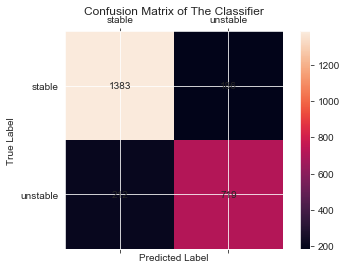

In [21]:
labels = ['stable', 'unstable']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_dt)
for (i, j), z in np.ndenumerate(cm_dt):
    ax.text(j, i, z, ha='center', va='center')
plt.title('Confusion Matrix of The Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

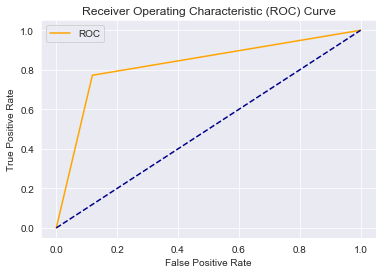

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [23]:
auc_dt = roc_auc_score(y_test, y_pred_dt)
print('AUC: %.2f' % auc_dt)

AUC: 0.83


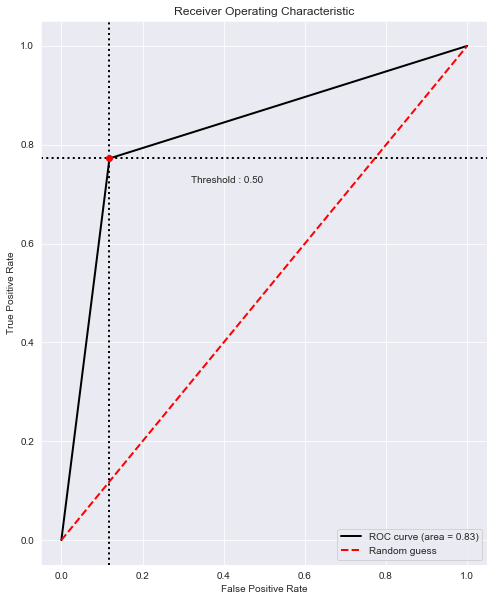

In [24]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred_dt, labels=["Stable", "Unstable"])

# Figures
plt.figure(figsize=(8,10))
bc.plot_roc_curve()
plt.show()

# SUMMARY OF ALL THE CLASSIFIERS

## ACCURACY

In [25]:
print("Accuracy Score for K Nearest Neighbor : {}".format(accuracy_knn))
print("Accuracy Score for Naive Bayes: {}".format(accuracy_nb))
print("Accuracy Score for Decision Trees: {}".format(accuracy_dt))

Accuracy Score for K Nearest Neighbor : 78.68
Accuracy Score for Naive Bayes: 82.8
Accuracy Score for Decision Trees: 84.08


## ROC-CURVE - AUC

In [26]:
print('AUC for ROC - K Nearest Neighbor: %.2f' % auc_knn)
print('AUC for ROC - Naive Bayes: %.2f' % auc_nb)
print('AUC for ROC - Decition Trees: %.2f' % auc_dt)

AUC for ROC - K Nearest Neighbor: 0.75
AUC for ROC - Naive Bayes: 0.79
AUC for ROC - Decition Trees: 0.83


## COMPUTATIONAL TIME

In [27]:
print("Training time for Data in K Nearesh Neighbors:{} ".format(time_elapsed_knn_train))
print("Testing time for Data in K Nearesh Neighbors:{} ".format(time_elapsed_knn_test))
print("Training time for Data in Naive Bayes:{} ".format(time_elapsed_nb_train))
print("Testing time for Data in K Naive Bayes:{} ".format(time_elapsed_nb_test))
print("Training time for Data in Decision Trees:{} ".format(time_elapsed_dt_train))
print("Testing time for Data in Decision Trees:{} ".format(time_elapsed_dt_train))

Training time for Data in K Nearesh Neighbors:0.008575299999996844 
Testing time for Data in K Nearesh Neighbors:0.26874420000000043 
Training time for Data in Naive Bayes:0.006443900000000724 
Testing time for Data in K Naive Bayes:0.0020844999999951597 
Training time for Data in Decision Trees:0.0027096000000028653 
Testing time for Data in Decision Trees:0.0027096000000028653 
